In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv('data/staedte.csv', header=None)
cities = ['Basel','Berlin','Frankfurt','Hamburg','Hannover','Kassel','Köln','München','Nürnberg','Stuttgart']
data

,0,1,2,3,4,5,6,7,8,9
0,0,45,17,44,42,32,31,27,25,11
1,45,0,34,14,12,21,35,37,25,39
2,17,34,0,30,18,5,4,22,9,7
3,44,14,30,0,1,15,24,43,38,41
4,42,12,18,1,0,2,13,40,28,33
5,32,21,5,15,2,0,10,29,16,19
6,31,35,4,24,13,10,0,36,23,20
7,27,37,22,43,40,29,36,0,3,8
8,25,25,9,38,28,16,23,3,0,6
9,11,39,7,41,33,19,20,8,6,0


In [11]:
n = data.shape[0]
c = np.identity(n) - np.ones(data.shape) / n
b = -1/2 * np.dot(np.dot(c, data.values**2), c)
b

array([[ 633.96, -417.14,  181.96, -367.34, -427.79, -187.89,  -56.64,
         207.81,   67.21,  365.86],
       [-417.14,  556.76, -290.14,  464.06,  343.61,   65.01, -227.24,
        -150.79,   28.61, -372.74],
       [ 181.96, -290.14,   18.96, -156.84,  -15.29,    4.11,  108.36,
          22.81,   31.71,   94.36],
       [-367.34,  464.06, -156.84,  567.36,  420.41,  178.31,  102.56,
        -385.49, -375.59, -447.44],
       [-427.79,  343.61,  -15.29,  420.41,  274.46,  142.36,  159.61,
        -407.44, -192.04, -297.89],
       [-187.89,   65.01,    4.11,  178.31,  142.36,   14.26,   64.01,
        -158.04,  -58.14,  -63.99],
       [ -56.64, -227.24,  108.36,  102.56,  159.61,   64.01,  213.76,
        -285.79,  -94.89,   16.26],
       [ 207.81, -150.79,   22.81, -385.49, -407.44, -158.04, -285.79,
         510.66,  313.56,  332.71],
       [  67.21,   28.61,   31.71, -375.59, -192.04,  -58.14,  -94.89,
         313.56,  125.46,  154.11],
       [ 365.86, -372.74,   94.36, -4

In [15]:
l, a = np.linalg.eig(b)
x = np.dot(a[:, :2], np.diag(np.sqrt(l[:2])))
x

array([[-20.50336672,  -6.61718153],
       [ 18.87044902,  15.67610058],
       [ -6.16203912,  -7.711578  ],
       [ 23.49977549,  -1.80337848],
       [ 18.61759952,  -3.48589364],
       [  6.74067193,  -2.52497343],
       [  3.40726491, -14.87406087],
       [-17.67561534,  14.03755061],
       [ -9.52744842,   9.07018123],
       [-17.26729128,  -1.76676646]])

Metric Multidimensional Scaling

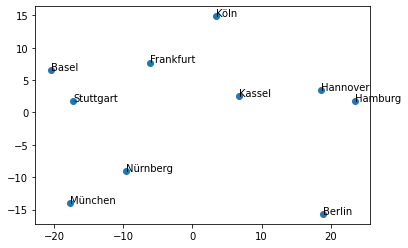

In [24]:
import matplotlib.pyplot as plt

plt.scatter(x[:, 0], -x[:, 1])
for name, v, w in zip(cities, x[:, 0], -x[:, 1]):
    plt.annotate(name, xy = (v, w))

Non-metric Scaling

0.1597455717214398

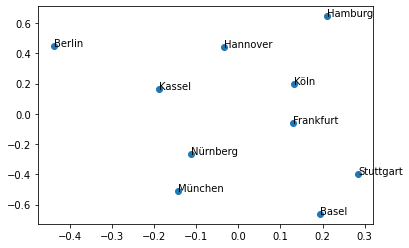

In [29]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, metric=False,dissimilarity ='precomputed')
res = mds.fit(data.values)

x2 = res.embedding_
plt.scatter(x2[:, 0], x2[:, 1])
for name, v, w in zip(cities, x2[:, 0], x2[:, 1]):
    plt.annotate(name, xy = (v, w))
    
res.stress_

Non-metric Scaling with metric Scaling as initial configuration

/home/philipp/.local/lib/python3.8/site-packages/sklearn/manifold/_mds.py:238: UserWarning: Explicit initial positions passed: performing only one init of the MDS instead of 4
  warnings.warn(


0.01045288790489269

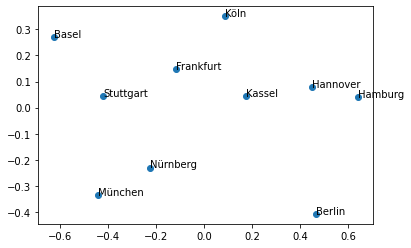

In [30]:
mds = MDS(n_components=2, metric=False,dissimilarity ='precomputed')
res = mds.fit(data.values, init=x)

x2 = res.embedding_
plt.scatter(x2[:, 0], -x2[:, 1])
for name, v, w in zip(cities, x2[:, 0], -x2[:, 1]):
    plt.annotate(name, xy = (v, w))
    
res.stress_